# Multicollinearity and Precision

A simulation that shows the effect of increasing multicollinearity on the distribution of an OLS estimator.  The estimator is $\hat \beta_2$ and $\delta$ controls the degree of multicollinearity.

In [2]:
%matplotlib inline

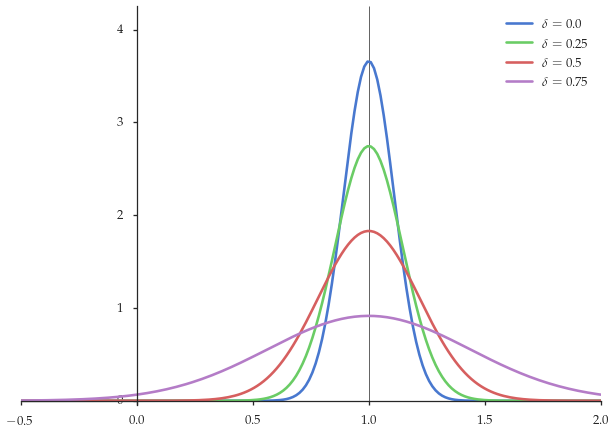

In [5]:

import numpy as np
import func_plot_style
from scipy.stats import norm 

N = 100
sigma2 = 1
beta1 = 1
beta2 = 1

plt, fig, ax = func_plot_style.subplots()

xmin, xmax = -0.5, 2.0
x = np.linspace(xmin, xmax, 180)
ax.set_ylim(-0.05, 4.25)

deltas = (0.0, 0.25, 0.5, 0.75)
X = np.empty((N, 2))

x1 = np.random.randn(N)
z = np.random.randn(N)


for delta in deltas:
    x2 = delta * x1 + (1 - delta) * z
    X[:, 0] = x1
    X[:, 1] = x2
    Z = np.linalg.inv(np.dot(X.T, X))
    v = sigma2 * Z[1, 1]  # Variance of OLS estimate
    f = lambda x: norm.pdf(x, beta2, np.sqrt(v))  # Distribution of OLS estimate
    lb = r'$\delta={}$'.format(delta)
    ax.plot(x, f(x), '-', lw=2.6, label=lb)

ax.vlines([beta2], [0], [4.25], lw=0.6)

ax.legend(loc='upper right')
plt.show()

